# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Nisa Rianti
- **Email:** mc322d5x2073@student.devacademy.id
- **ID Dicoding:** MC322D5X2073

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sedepa?
- Bagaimana tren peminjaman sepeda berdasarkan hari dan jam tertentu?

## Import Semua Packages/Library yang Digunakan

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [5]:
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')

### Gathering Data

In [6]:
display(day_df.head())
display(hour_df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [7]:
print(day_df.info())
print(hour_df.info())
print(day_df.describe())
print(hour_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

### Cleaning Data

In [8]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

## Exploratory Data Analysis (EDA)

### Explore ...

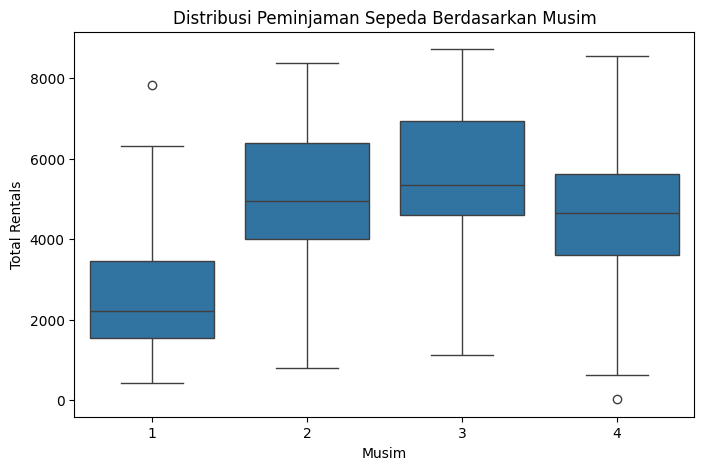

In [11]:
# Melihat distribusi jumlah peminjaman sepeda berdasarkan musim
plt.figure(figsize=(8, 5))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.xlabel('Musim')
plt.ylabel('Total Rentals')
plt.title('Distribusi Peminjaman Sepeda Berdasarkan Musim')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:Pengaruh cuaca terhadap jumlah peminjaman sepeda

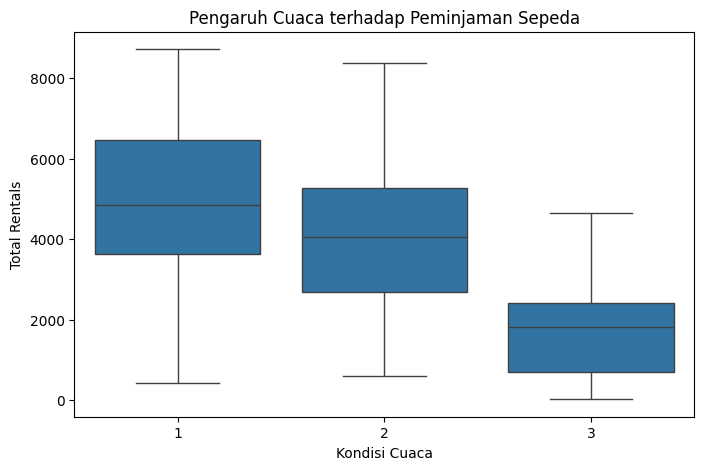

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Rentals')
plt.title('Pengaruh Cuaca terhadap Peminjaman Sepeda')
plt.show()

### Pertanyaan 2:Tren peminjaman sepeda berdasarkan hari dalam seminggu

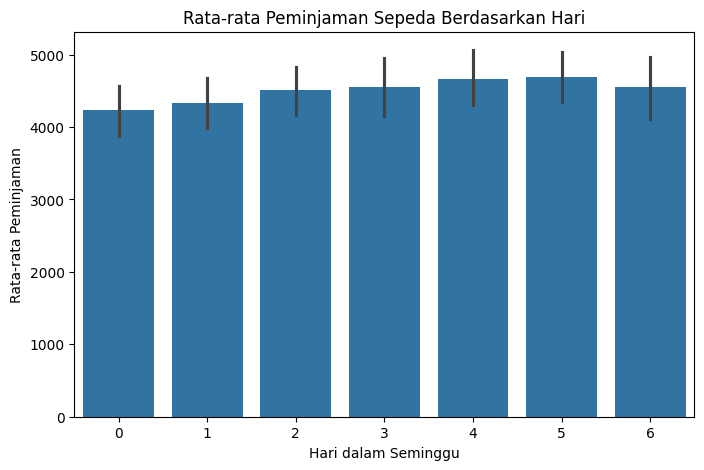

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weekday', y='cnt', data=day_df, estimator=np.mean)
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Peminjaman')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Hari')
plt.show()

## Analisis Lanjutan (Opsional)

In [17]:
bins = [0, 1000, 4000, 7000]
labels = ['Low', 'Medium', 'High']
day_df['rental_category'] = pd.cut(day_df['cnt'], bins=bins, labels=labels)

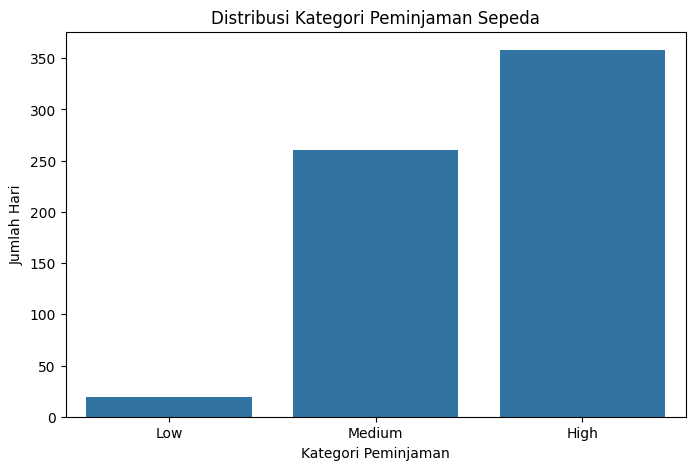

In [18]:
# Visualisasi distribusi kategori peminjaman
plt.figure(figsize=(8, 5))
sns.countplot(x='rental_category', data=day_df)
plt.xlabel('Kategori Peminjaman')
plt.ylabel('Jumlah Hari')
plt.title('Distribusi Kategori Peminjaman Sepeda')
plt.show()

## Conclusion

- Cuaca mempengaruhi jumlah peminjaman sepeda, dengan cuaca lebih baik meningkatkan peminjaman.
- Tren peminjaman lebih tinggi pada hari kerja dibandingkan akhir pekan.

# Menyimpan dataset yang telah dibersihkan

In [19]:
day_df.to_csv('/content/main_data.csv', index=False)

In [20]:
pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.3.0
aiohappyeyeballs==2.4.6
aiohttp==3.11.13
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==7.0.1
astropy-iers-data==0.2025.3.3.0.34.45
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.38.0
bigquery-magics==0.6.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.2.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.

In [22]:
day_df.to_csv('/content/requirements.txt', index=False, sep='\t')